In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from scipy.io import loadmat
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
WA = r"$\textrm{W}_1(\hat{\textbf{p}}_{\mathcal{H}(\mathcal{T})}, \textbf{p}^\star_{\mathcal{H}(\mathcal{T})})$"
TV = r"$\textrm{TV}(\hat{\textbf{p}}_{\mathcal{H}(\mathcal{T})}, \textbf{p}^\star_{\mathcal{H}(\mathcal{T})})$"
label_size = 22
tick_size = 20
title_size = 24
legend_size = 18

In [2]:
df_n_h = pd.read_parquet("varying_n_h.parquet")
df_n_p = pd.read_parquet("varying_n_p.parquet")

label_mapping = {"noiseless": "Noiseless", 
                 "bernoulli01": r"Bern($0.01$)", 
                 "bernoulli02": r"Bern($0.02$)", 
                 "bernoulli05": r"Bern($0.05$)", 
                 "sigmoid500": r"Sigmoid($c=500$)", 
                 "sigmoid300": r"Sigmoid($c=300$)"}

In [3]:
df_colors = pd.read_parquet("colors_tv_vs_np.parquet")
mdict = loadmat("distribution.mat")
x = mdict["x"].reshape(-1)
width = mdict["width"].reshape(-1)
pop_height = mdict["pop_height"].reshape(-1)
est_height = mdict["est_height"].reshape(-1)
points = mdict["points"].reshape(-1)

/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_1801/120502561.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[1].set_ylim([0.0, 0.04])
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_1801/120502561.py:40: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[1].set_ylim([0, 0.1])
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_1801/120502561.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


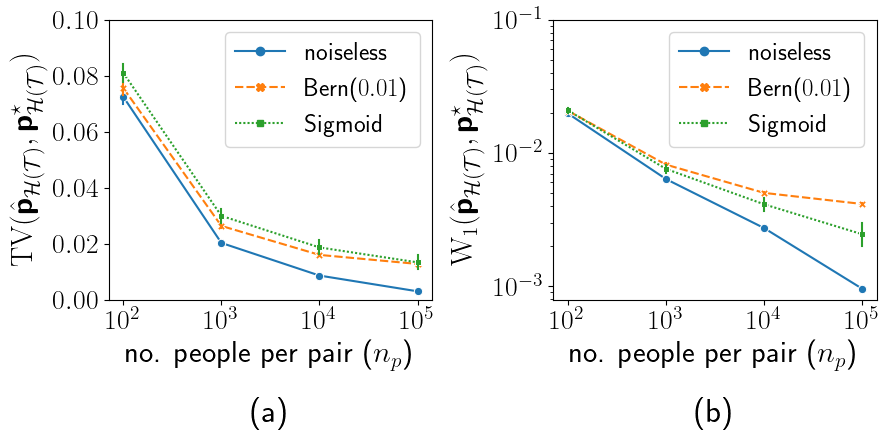

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.5))

sns.lineplot(data=df_n_p[(df_n_p.user_dist == "mix3gaussian") 
                         & (df_n_p.variable == "total_variation_q_hat")
                         & ((df_n_p.noise == "noiseless") | (df_n_p.noise == "bernoulli01") | (df_n_p.noise == "sigmoid500"))],
             x="n_p",
             y="err",
             err_style="bars",
             markers=True,
             hue="noise",
             style="noise",
             ax=axs[0])
axs[0].set_xscale("log")
axs[0].set_xticks([100, 1000, 10000, 100000])
axs[0].set_ylabel(TV, fontsize=label_size)
axs[0].set_xlabel(r"no. people per pair ($n_p$)", fontsize=label_size)

sns.lineplot(data=df_n_p[(df_n_p.user_dist == "mix3gaussian") 
                         & (df_n_p.variable == "wasserstein_q_hat")
                         & ((df_n_p.noise == "noiseless") | (df_n_p.noise == "bernoulli01") | (df_n_p.noise == "sigmoid500"))],
             x="n_p",
             y="err",
             err_style="bars",
             markers=True,
             hue="noise",
             style="noise",
             ax=axs[1])
axs[1].set_yscale("log")
axs[1].set_xscale("log")
axs[1].set_ylim([0.0, 0.04])
axs[1].set_xticks([100, 1000, 10000, 100000])
axs[1].set_ylabel(WA, fontsize=label_size)
axs[1].set_xlabel(r"no. people per pair ($n_p$)", fontsize=label_size)

handles, labels = axs[0].get_legend_handles_labels()
new_labels = ['noiseless', 'Bern($0.01$)', 'Sigmoid']
axs[0].legend(handles, new_labels, fontsize=legend_size)
axs[1].legend(handles, new_labels, fontsize=legend_size)
axs[0].set_ylim([0, 0.1])
axs[1].set_ylim([0, 0.1])

for i, ax in enumerate(axs):
        ax.tick_params(axis='both', which='major', labelsize=tick_size)
        ax.set_title("(" + f"{chr(97 + i)}" + ")", loc="center", y=0, fontsize=title_size, pad=-70, verticalalignment="top")

# fig.legend(handles, labels, loc="outside lower center", bbox_to_anchor=(0.5, -0.18), fancybox=False, shadow=False, ncol=3, fontsize=legend_size)
fig.tight_layout()
fig.savefig(f"fig/1d_aistats_simulation.pdf", dpi=300, format="pdf", bbox_inches="tight")
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_1801/481051815.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


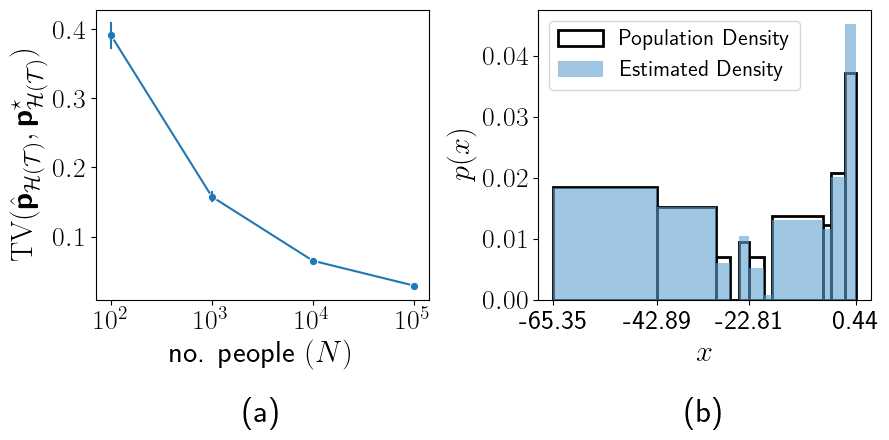

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.5))
sns.lineplot(data=df_colors,
                  x='n',
                  y='err',
                  err_style='bars',
                  marker='o',
                  markers=True,
                  ax=axs[0])
axs[0].set_xscale('log')
axs[0].set_xticks([1e2, 1e3, 1e4, 1e5])
axs[0].set_xlabel('no. people $(N)$', fontsize=label_size)
axs[0].set_ylabel(TV, fontsize=label_size)
axs[0].legend().remove()

axs[1].bar(x=x,
              height=pop_height,
              width=width,
              align='edge',
              alpha=1,
              color='none',
              edgecolor='black',
              linewidth=2,
              label=r'Population Density')
axs[1].bar(x=x,
              height=est_height,
              width=width,
              align='edge',
              alpha=0.6,
              color='#60A0D0',
              edgecolor='#60A0D0',
              linewidth=0,
              label=r'Estimated Density')

axs[1].set_xlabel(r"$x$", fontsize=label_size)
axs[1].set_ylabel(r"$p(x)$", fontsize=label_size)
axs[1].set_xticks(points[[0, 1, 5, 11]])
axs[1].set_xticklabels(np.round(points[[0, 1, 5, 11]], 2), rotation=0)
axs[1].legend(fontsize=legend_size - 2)


for i, ax in enumerate(axs):
        ax.tick_params(axis='both', which='major', labelsize=tick_size)
        ax.set_title(
            "(" + f"{chr(97 + i)}" + ")", loc="center", y=0, fontsize=title_size,
            pad=-70, verticalalignment="top")

# fig.legend(handles, labels, loc="outside lower center", bbox_to_anchor=(0.5, -0.18), fancybox=False, shadow=False, ncol=3, fontsize=legend_size)
fig.tight_layout()
fig.savefig(f"fig/1d_aistats_colors.pdf", dpi=300, format="pdf", bbox_inches="tight")
fig.show()